In [7]:
!apt-get install openjdk-11-jdk -y
!wget https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz
!mv spark-3.5.0-bin-hadoop3 /usr/local/spark
!pip install pyspark

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxt-dev libxtst6 libxxf86dga1 openjdk-11-jre
  x11-utils
Suggested packages:
  libxt-doc openjdk-11-demo openjdk-11-source visualvm mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk
  openjdk-11-jre x11-utils
0 upgraded, 10 newly installed, 0 to remove and 38 not upgraded.
Need to get 5,367 kB of archives.
After this operation, 15.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Get:3 http://archive.ubuntu.com/ubuntu jam

In [8]:
!rm -rf /usr/local/spark
!rm -f spark-3.5.0-bin-hadoop3.tgz


In [9]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz


In [10]:
!tar -xzf spark-3.5.0-bin-hadoop3.tgz
!mv spark-3.5.0-bin-hadoop3 /usr/local/spark


In [11]:
!ls /usr/local/spark/bin | grep spark-submit


spark-submit
spark-submit2.cmd
spark-submit.cmd


In [12]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/usr/local/spark"
os.environ["HADOOP_HOME"] = "/usr/local/spark"
os.environ["PATH"] += os.pathsep + os.path.join(os.environ["SPARK_HOME"], "bin")

In [17]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("HDFS_Spark") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://172.30.0.2:9000") \
    .getOrCreate()

In [19]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaiswalshrey","key":"dc5f620bdffaf70b8f2c5075059792d9"}'}

In [ ]:
# Read multiple CSVs from HDFS
df = spark.read.csv(
    "hdfs://172.30.0.2:9000/user/*.csv",
    header=True,
    inferSchema=True
)

# Display first few rows
df.show(5)


In [20]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [21]:
!pip install kaggle


In [22]:
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store


Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
ecommerce-behavior-data-from-multi-category-store.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!unzip ecommerce-behavior-data-from-multi-category-store.zip -d ecommerce_dataset


Archive:  ecommerce-behavior-data-from-multi-category-store.zip
replace ecommerce_dataset/2019-Nov.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd

df = pd.read_csv("/content/ecommerce_dataset/2019-Nov.csv",
                        nrows=10000000,
                        low_memory=False)
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [26]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 686.6+ MB


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [27]:
df.describe()


,product_id,category_id,price,user_id
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.100008e+07,2.057828e+18,2.925741e+02,5.354292e+08
std,1.228346e+07,1.943274e+16,3.538111e+02,2.037214e+07
min,1.000365e+06,2.053014e+18,0.000000e+00,1.030022e+07
25%,1.005252e+06,2.053014e+18,6.667000e+01,5.159950e+08
50%,5.100722e+06,2.053014e+18,1.653100e+02,5.306267e+08
75%,1.640001e+07,2.053014e+18,3.654600e+02,5.548916e+08
max,6.210003e+07,2.180737e+18,2.574070e+03,5.684226e+08


In [28]:
# Check missing values
df_missing_values = df.isnull().sum()
print("\nMissing Count per Column:\n", df_missing_values)

# Check duplicate rows
df_duplicate_data = df.duplicated().sum()
print("\nDuplicate Data Count:", df_duplicate_data)



Missing Count per Column:
 event_time             0
event_type             0
product_id             0
category_id            0
category_code    3302790
brand            1410463
price                  0
user_id                0
user_session           0
dtype: int64

Duplicate Data Count: 3709


In [29]:
missing_rate = df.isna().mean()
print("\n Missing Rate",missing_rate)


 Missing Rate event_time       0.000000
event_type       0.000000
product_id       0.000000
category_id      0.000000
category_code    0.330279
brand            0.141046
price            0.000000
user_id          0.000000
user_session     0.000000
dtype: float64


In [30]:
df['category_code'] = df['category_code'].fillna('unknown')
df['brand'] = df['brand'].fillna('unknown')

df['is_category_missing'] = df['category_code'].eq('unknown').astype(int)
df['is_brand_missing'] = df['brand'].eq('unknown').astype(int)

df = df.drop_duplicates()

print("\nMissing & Duplicate values handled")



Missing & Duplicate values handled


In [31]:
print("Total Number of records:", df.shape[0])
print(df.nunique())

Total Number of records: 9996291
event_time              523423
event_type                   3
product_id              133917
category_id                624
category_code              127
brand                     3374
price                    34857
user_id                1104582
user_session           2190461
is_category_missing          2
is_brand_missing             2
dtype: int64


In [32]:
print("\nUnique Events:- ",df['event_type'].unique())
print("\nUnique Category",df['category_code'].unique())
print("\nUnique Brand",df['brand'].unique())
print("\nUnique user sessions",df['user_session'].unique())


Unique Events:-  ['view' 'cart' 'purchase']

Unique Category ['electronics.smartphone' 'appliances.sewing_machine' 'unknown'
 'appliances.kitchen.washer' 'computers.notebook'
 'furniture.living_room.sofa' 'appliances.kitchen.refrigerators'
 'furniture.kitchen.chair' 'appliances.kitchen.dishwasher'
 'electronics.audio.headphone' 'appliances.environment.vacuum'
 'appliances.environment.water_heater' 'electronics.camera.video'
 'electronics.clocks' 'electronics.video.tv' 'apparel.tshirt'
 'apparel.jeans' 'construction.tools.drill' 'auto.accessories.compressor'
 'computers.components.motherboard' 'computers.peripherals.printer'
 'computers.desktop' 'auto.accessories.player' 'accessories.bag'
 'computers.components.videocards' 'furniture.bedroom.bed'
 'furniture.bathroom.bath' 'electronics.audio.subwoofer'
 'construction.tools.welding' 'construction.tools.saw'
 'furniture.kitchen.table' 'apparel.shoes' 'construction.tools.light'
 'apparel.shirt' 'construction.tools.painting'
 'furniture.li

In [33]:
#Handling Outlier
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])


Number of outliers: 858211


In [34]:
df.groupby(['event_type'])['price'].apply(lambda x: x.describe()).unstack(1).rename_axis(columns='pricing_details')

pricing_details,count,mean,std,min,25%,50%,75%,max
event_type,,,,,,,,
cart,118378.0,348.363976,359.606451,0.88,128.18,210.81,458.12,2545.33
purchase,147100.0,296.243021,343.095895,0.79,68.21,170.05,361.30,2574.07
view,9730813.0,291.839814,353.864975,0.00,66.39,164.93,363.72,2574.07


# Visualizations Of Dataset

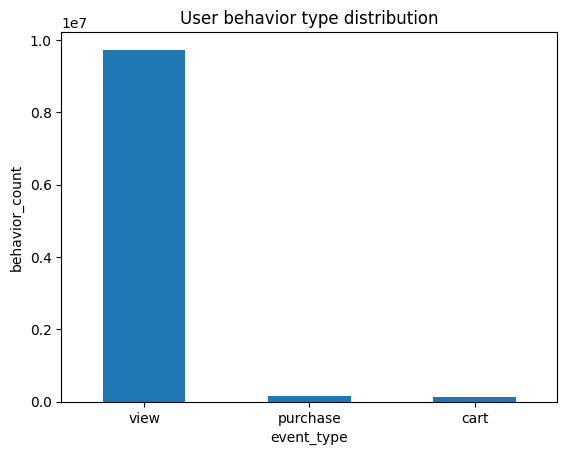

In [35]:
#User Behaviour Plotting
import matplotlib.pyplot as plt
import seaborn as sns

behaviour_counts = df['event_type'].value_counts()
behaviour_counts.plot(kind='bar', title='User behavior type distribution')
plt.ylabel('behavior_count')
plt.xticks(rotation=0)
plt.show()
plt.close()

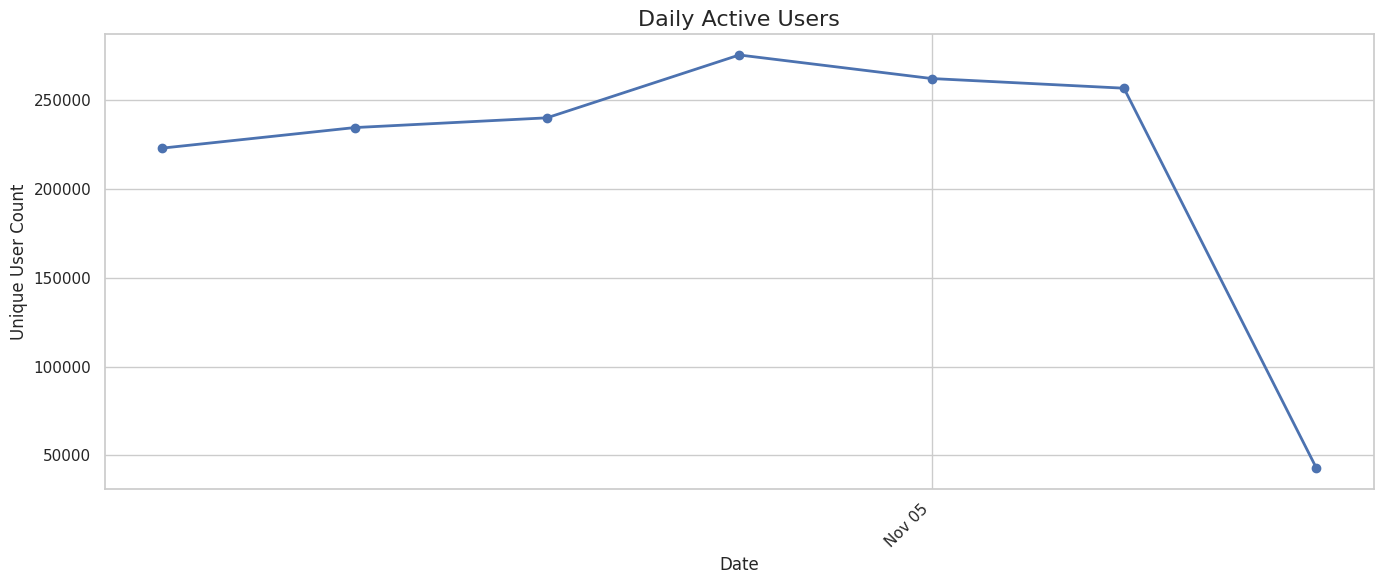

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

# Set Seaborn style
sns.set(style='whitegrid')

# Ensure datetime conversion
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
df['date'] = df['event_time'].dt.date

# Group by date
daily_users = df.groupby('date')['user_id'].nunique().reset_index(name='user_count')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_users['date'], daily_users['user_count'], marker='o', linestyle='-', linewidth=2)

plt.title('Daily Active Users', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unique User Count', fontsize=12)

# ✅ Format x-axis to avoid clutter
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))   # show one tick per week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))      # format as "Oct 18"

# Rotate labels neatly
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Most Popular Category by number of purchases

In [37]:
popular_category =(df.loc[(df['category_code'] != 'unknown') & (df['event_type'] == 'purchase'), 'category_code'].value_counts().head(10)
              .rename('category_count'))

print(popular_category)

category_code
electronics.smartphone              63807
electronics.audio.headphone          6114
electronics.video.tv                 4075
electronics.clocks                   3451
appliances.kitchen.washer            2855
computers.notebook                   2678
appliances.environment.vacuum        2062
appliances.kitchen.refrigerators     1735
apparel.shoes                        1162
electronics.tablet                    868
Name: category_count, dtype: int64


/tmp/ipython-input-1456245688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_category.values, y=popular_category.index, palette='plasma')


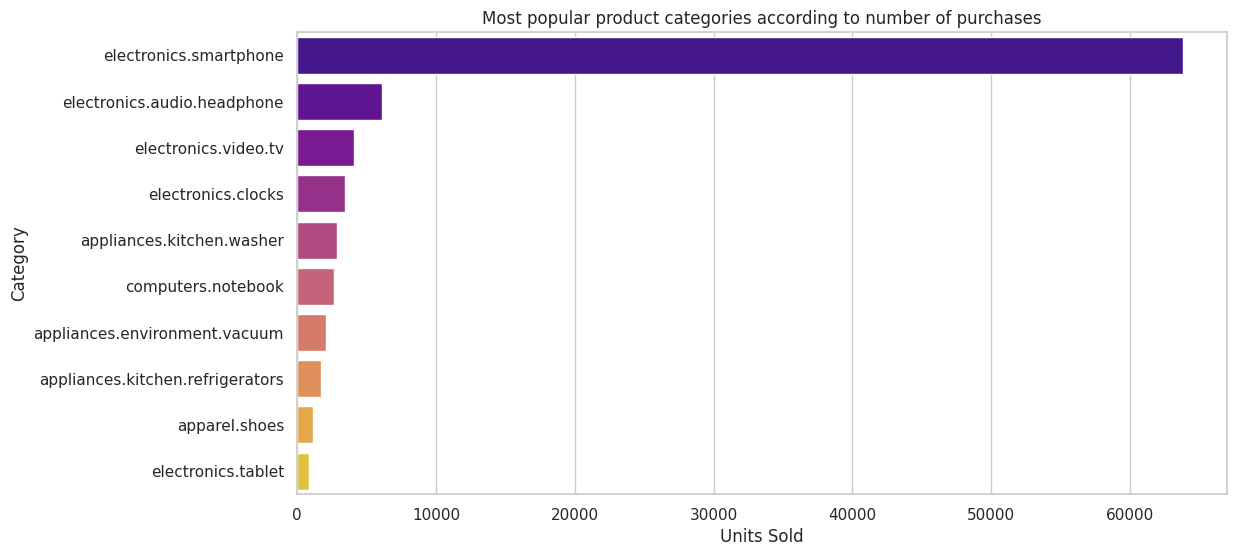

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_category.values, y=popular_category.index, palette='plasma')

plt.title('Most popular product categories according to number of purchases')
plt.ylabel('Category')
plt.xlabel('Units Sold')
plt.show()
plt.close()

Top 10 brands with highest total frequency

In [40]:
hot_brand = df.loc[df['brand'] != 'unknown', 'brand'].value_counts().head(10).rename('brand_count').to_frame()
hot_brand['brand_radio'] = df.loc[df['brand'] != 'unknown', 'brand'].value_counts(normalize=True).head(10)
hot_brand

,brand_count,brand_radio
brand,,
samsung,1156505,0.134698
apple,972412,0.113257
xiaomi,688773,0.080221
huawei,224901,0.026194
cordiant,150331,0.017509
lucente,142628,0.016612
lg,137464,0.016010
bosch,131038,0.015262
oppo,125588,0.014627


/tmp/ipython-input-1602053009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hot_brand.iloc[:, 0], y=hot_brand.index, palette='magma')


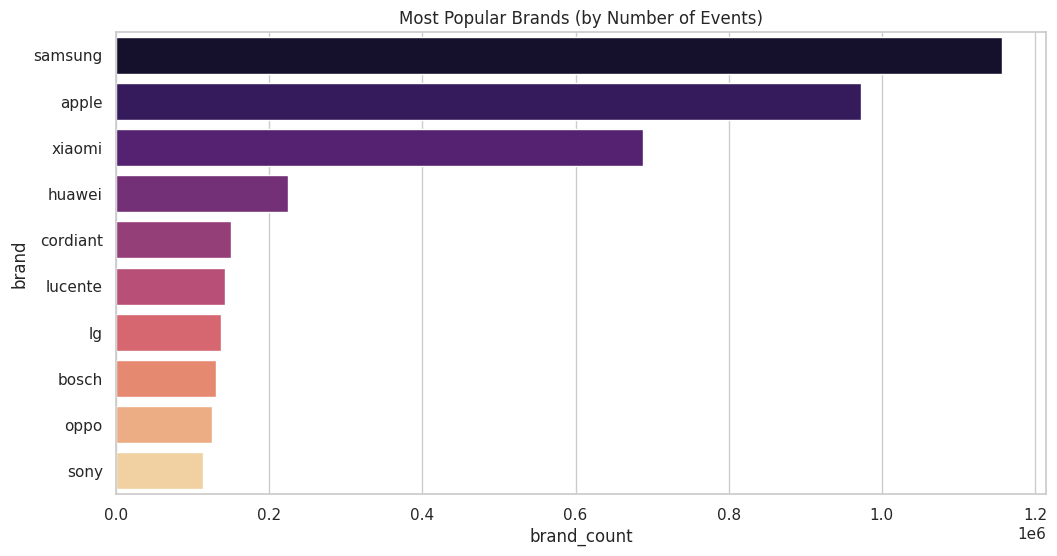

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hot_brand.iloc[:, 0], y=hot_brand.index, palette='magma')
plt.title('Most Popular Brands (by Number of Events)')
plt.show()
plt.close()

In [ ]:
df.to_csv("preprocessed_ecommerce.csv", index=False)
